# Load and Analyze Customer Orders with IBM Studio

##  1. Loading data

In [48]:
# The code was removed by Watson Studio for sharing.

,order_date,pages_visited,order_id,customer_id,tshirt_category,tshirt_price,tshirt_quantity
0,2016/09/04,9,HTS-038040-0002,038040,White T-Shirt M,20.0,1
1,2014/11/14,11,HTS-801797-0001,801797,White T-Shirt M,20.0,1
2,2017/02/26,10,HTS-vft1eu-0003,vft1eu,White T-Shirt F,18.0,3
3,2013/12/01,10,HTS-914324-0001,914324,Wh Tshirt F,18.0,1
4,2015/10/22,12,HTS-88ua9r-0001,88ua9r,White T-Shirt M,20.0,1


## 2. Exploring Data

In [49]:
df_data_1.describe()

,pages_visited,tshirt_price,tshirt_quantity
count,26552.000000,26552.000000,26552.000000
mean,10.838016,20.223768,2.693394
std,3.589299,2.220651,3.456182
min,2.000000,17.500000,1.000000
25%,8.000000,18.000000,1.000000
50%,11.000000,20.000000,2.000000
75%,13.000000,23.000000,3.000000
max,28.000000,24.000000,29.000000


In [50]:
df_data_1.dtypes

order_date          object
pages_visited        int64
order_id            object
customer_id         object
tshirt_category     object
tshirt_price       float64
tshirt_quantity      int64
dtype: object

In [51]:
print(df_data_1.isnull().sum())

order_date         0
pages_visited      0
order_id           0
customer_id        0
tshirt_category    0
tshirt_price       0
tshirt_quantity    0
dtype: int64


## 3. Cleaning data

###  Cleaning up categorical column "tshirt_category"

In [52]:
df_data_1['tshirt_category'].unique()

array(['White T-Shirt M', 'White T-Shirt F', 'Wh Tshirt F',
       'Black T-Shirt F', 'Hoodie', 'Black T-Shirt M', 'Tennis Shirt',
       'Wh Tshirt M', 'Bl Tshirt F', 'Bl Tshirt M'], dtype=object)

### Clearly some of these categories are the should be combined

In [53]:
diction = {
    'Wh Tshirt M': 'White T-Shirt M',
    'Wh Tshirt F': 'White T-Shirt F',
    'Bl Tshirt M': 'Black T-Shirt M',
    'Bl Tshirt F': 'Black T-Shirt F'    
}
# TODO probably should use regex to make this more efficient
  

# df_data_1['tshirt_category'] = df_data_1['tshirt_category'].map(diction)
# don't use map because we only want to replace some of the catogories, above code leaves many nulls

df_data_1.tshirt_category.replace(diction, inplace=True)

# see transformed column categories
df_data_1['tshirt_category'].unique()

array(['White T-Shirt M', 'White T-Shirt F', 'Black T-Shirt F', 'Hoodie',
       'Black T-Shirt M', 'Tennis Shirt'], dtype=object)

## 4. Visual Analysis

,pages_visited,tshirt_price,tshirt_quantity
pages_visited,1.000000,-0.017822,-0.038166
tshirt_price,-0.017822,1.000000,0.020761
tshirt_quantity,-0.038166,0.020761,1.000000


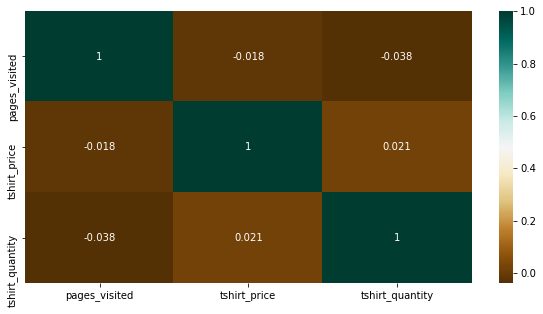

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
c = df_data_1.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

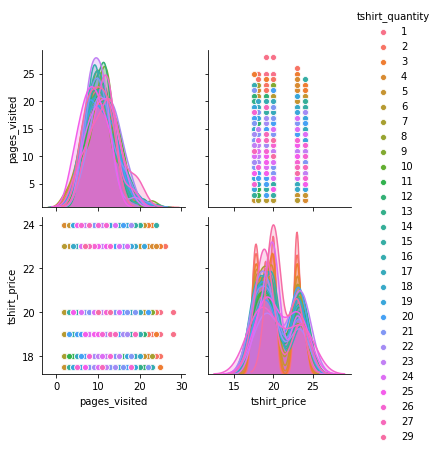

In [55]:
sns.pairplot(df_data_1, hue = 'tshirt_quantity')
# TODO Understand error